## M-Estimators for Robust Linear Modeling

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm

/Users/gyg/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


* An M-estimator minimizes the function 

$$Q(e_i, \rho) = \sum_i~\rho(\frac{e_i}{s})$$

where $\rho$ is a symmetric function of the residuals 

* The effect of $\rho$ is to reduce the influence of outliers
* $s$ is an estimate of scale. 
* The robust estimates $\hat{\beta}$ are computed by the iteratively re-weighted least squares algorithm

In [ ]:
norms = sm.robust.norms

In [ ]:
def plot_weights(support, weights_func, xlabels, xticks):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(support, weights_func(support))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=16)
    ax.set_ylim(-.1, 1.1)
    return ax

### Andrew's Wave

In [ ]:
help(norms.AndrewWave.weights)

In [ ]:
a = 1.339
support = np.linspace(-np.pi*a, np.pi*a, 100)
andrew = norms.AndrewWave(a=a)
plot_weights(support, andrew.weights, ['$-\pi*a$', '0', '$\pi*a$'], [-np.pi*a, 0, np.pi*a]);

### Hampel's 17A

In [ ]:
help(norms.Hampel.weights)

In [ ]:
c = 8
support = np.linspace(-3*c, 3*c, 1000)
hampel = norms.Hampel(a=2., b=4., c=c)
plot_weights(support, hampel.weights, ['3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Huber's t

In [ ]:
help(norms.HuberT.weights)

In [ ]:
t = 1.345
support = np.linspace(-3*t, 3*t, 1000)
huber = norms.HuberT(t=t)
plot_weights(support, huber.weights, ['-3*t', '0', '3*t'], [-3*t, 0, 3*t]);

### Least Squares

In [ ]:
help(norms.LeastSquares.weights)

In [ ]:
support = np.linspace(-3, 3, 1000)
lst_sq = norms.LeastSquares()
plot_weights(support, lst_sq.weights, ['-3', '0', '3'], [-3, 0, 3]);

### Ramsay's Ea

In [ ]:
help(norms.RamsayE.weights)

In [ ]:
a = .3
support = np.linspace(-3*a, 3*a, 1000)
ramsay = norms.RamsayE(a=a)
plot_weights(support, ramsay.weights, ['-3*a', '0', '3*a'], [-3*a, 0, 3*a]);

### Trimmed Mean

In [ ]:
help(norms.TrimmedMean.weights)

In [ ]:
c = 2
support = np.linspace(-3*c, 3*c, 1000)
trimmed = norms.TrimmedMean(c=c)
plot_weights(support, trimmed.weights, ['-3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Tukey's Biweight

In [ ]:
help(norms.TukeyBiweight.weights)

In [ ]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = norms.TukeyBiweight(c=c)
plot_weights(support, tukey.weights, ['-3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Scale Estimators

In [2]:
x = np.array([1, 2, 3, 4, 500])

* The mean is not a robust estimator of location

In [3]:
x.mean()

102.0

* The median, on the other hand, is a robust estimator with a breakdown point of 50%

In [4]:
np.median(x)

3.0

In [5]:
x.std()

199.00251254695254

Median Absolute Deviation

$$ median_i |X_i - median_j(X_j)|) $$

Standardized Median Absolute Deviation is a consistent estimator for $\hat{\sigma}$

$$\hat{\sigma}=K \cdot MAD$$

where $K$ depends on the distribution. For the normal distribution for example,

$$K = \Phi^{-1}(.75)$$

In [6]:
stats.norm.ppf(.75)

NameError: name 'stats' is not defined

In [7]:
print x

[  1   2   3   4 500]


In [10]:
sm.robust.scale.stand_mad(x)

/Users/gyg/anaconda/lib/python2.7/site-packages/statsmodels/robust/scale.py:49: FutureWarning: stand_mad is deprecated and will be removed in 0.7.0. Use mad instead.
  "instead.", FutureWarning)


1.482602218505602

In [ ]:
np.array([1,2,3,4,5.]).std()

In [16]:
np.random.seed(12345)
fat_tails = stats.t(6).rvs(40)

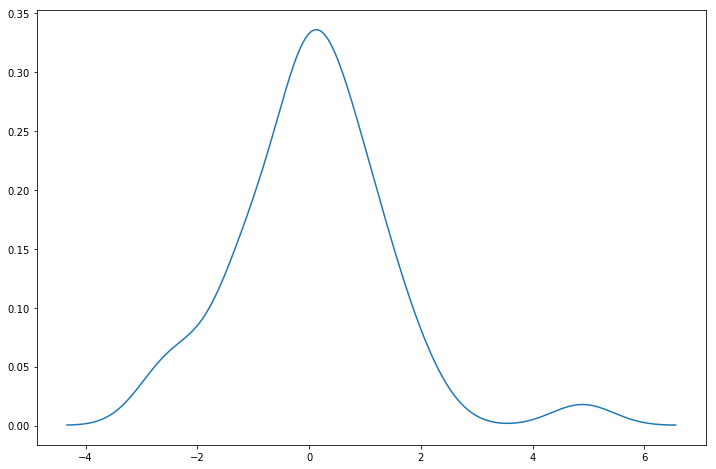

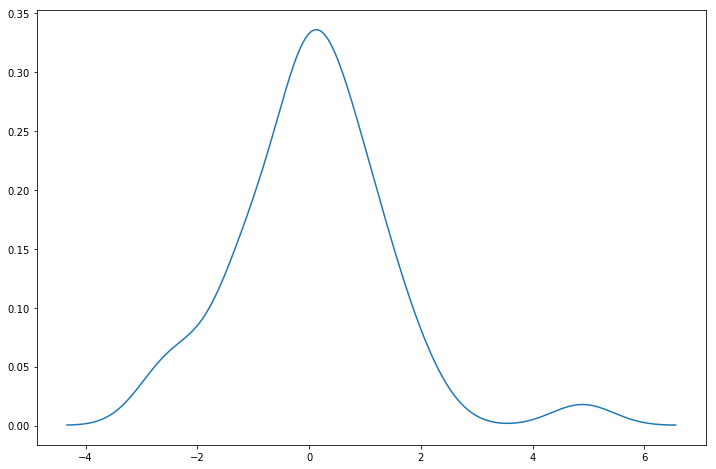

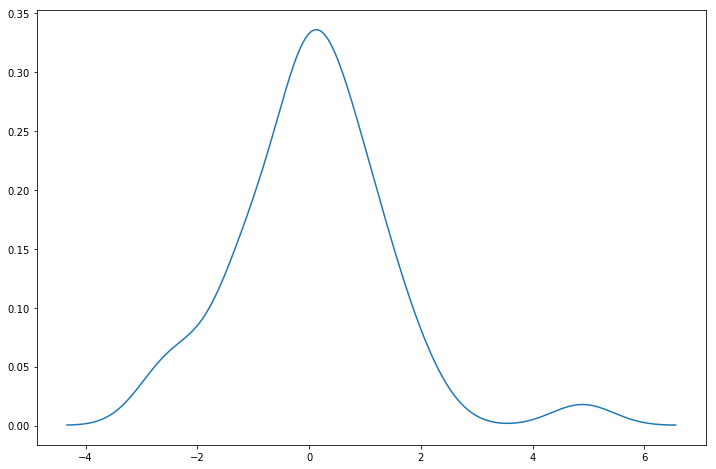

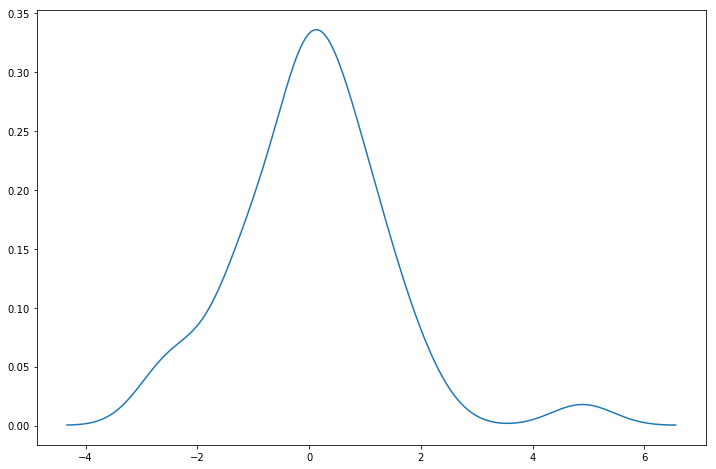

In [18]:
kde = sm.nonparametric.KDEUnivariate(fat_tails)
kde.fit()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density);
plt.show()

In [ ]:
print fat_tails.mean(), fat_tails.std()

In [19]:
print stats.norm.fit(fat_tails)

(0.068823104481087499, 1.3471633229698652)


In [20]:
print stats.t.fit(fat_tails, f0=6)

(6, 0.039009187170278181, 1.0564230978488927)


In [21]:
huber = sm.robust.scale.Huber()
loc, scale = huber(fat_tails)
print loc, scale

0.0404898433327 1.15571400476


In [23]:
sm.robust.stand_mad(fat_tails)

1.1153350011654151

In [22]:
sm.robust.stand_mad(fat_tails, c=stats.t(6).ppf(.75))

1.0483916565928972

In [24]:
sm.robust.scale.mad(fat_tails)

1.1153350011654151

### Duncan's Occupational Prestige data - M-estimation for outliers

In [25]:
from statsmodels.graphics.api import abline_plot
from statsmodels.formula.api import ols, rlm

In [26]:
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data

In [27]:
print prestige.head(10)

            type  income  education  prestige
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90
minister    prof      21         84        87
professor   prof      64         93        93
dentist     prof      80        100        90
reporter      wc      67         87        52
engineer    prof      72         86        88


In [28]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211, xlabel='Income', ylabel='Prestige')
ax1.scatter(prestige.income, prestige.prestige)
xy_outlier = prestige.ix['minister'][['income','prestige']]
ax1.annotate('Minister', xy_outlier, xy_outlier+1, fontsize=16)
ax2 = fig.add_subplot(212, xlabel='Education',
                           ylabel='Prestige')
ax2.scatter(prestige.education, prestige.prestige);

/Users/gyg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [29]:
ols_model = ols('prestige ~ income + education', prestige).fit()
print ols_model.summary()

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 28 Jun 2017   Prob (F-statistic):           8.65e-17
Time:                        00:01:24   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

In [34]:
infl = ols_model.get_influence()
student = infl.summary_frame().student_resid
print student

accountant            0.303900
pilot                 0.340920
architect             0.072256
author                0.000711
chemist               0.826578
minister              3.134519
professor             0.768277
dentist              -0.498082
reporter             -2.397022
engineer              0.306225
undertaker           -0.187339
lawyer               -0.303082
physician             0.355687
welfare.worker       -0.411406
teacher               0.050510
conductor            -1.704032
contractor            2.043805
factory.owner         1.602429
store.manager         0.142425
banker                0.508388
bookkeeper           -0.902388
mail.carrier         -1.433249
insurance.agent      -1.930919
store.clerk          -1.760491
carpenter             1.068858
electrician           0.731949
RR.engineer           0.808922
machinist             1.887047
auto.repairman        0.522735
plumber              -0.377954
gas.stn.attendant    -0.666596
coal.miner            1.018527
streetca

In [31]:
print student.ix[np.abs(student) > 2]

minister      3.134519
reporter     -2.397022
contractor    2.043805
Name: student_resid, dtype: float64


/Users/gyg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [32]:
print infl.summary_frame().ix['minister']

dfb_Intercept      0.144937
dfb_income        -1.220939
dfb_education      1.263019
cooks_d            0.566380
dffits             1.433935
dffits_internal    1.303510
hat_diag           0.173058
standard_resid     2.849416
student_resid      3.134519
Name: minister, dtype: float64


/Users/gyg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [35]:
sidak = ols_model.outlier_test('sidak')
sidak.sort_values('unadj_p', inplace=True)
print sidak

                    student_resid   unadj_p  sidak(p)
minister                 3.134519  0.003177  0.133421
reporter                -2.397022  0.021170  0.618213
contractor               2.043805  0.047433  0.887721
insurance.agent         -1.930919  0.060428  0.939485
machinist                1.887047  0.066248  0.954247
store.clerk             -1.760491  0.085783  0.982331
conductor               -1.704032  0.095944  0.989315
factory.owner            1.602429  0.116738  0.996250
mail.carrier            -1.433249  0.159369  0.999595
streetcar.motorman      -1.104485  0.275823  1.000000
carpenter                1.068858  0.291386  1.000000
coal.miner               1.018527  0.314400  1.000000
bartender               -0.902422  0.372104  1.000000
bookkeeper              -0.902388  0.372122  1.000000
soda.clerk              -0.883095  0.382334  1.000000
chemist                  0.826578  0.413261  1.000000
RR.engineer              0.808922  0.423229  1.000000
professor                0.7

In [ ]:
fdr = ols_model.outlier_test('fdr_bh')
fdr.sort('unadj_p', inplace=True)
print fdr

In [ ]:
rlm_model = rlm('prestige ~ income + education', prestige).fit()
print rlm_model.summary()

In [ ]:
print rlm_model.weights

### Hertzprung Russell data for Star Cluster CYG 0B1 - Leverage Points

* Data is on the luminosity and temperature of 47 stars in the direction of Cygnus.

In [ ]:
dta = sm.datasets.get_rdataset("starsCYG", "robustbase", cache=True).data

In [ ]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, xlabel='log(Temp)', ylabel='log(Light)', title='Hertzsprung-Russell Diagram of Star Cluster CYG OB1')
ax.scatter(*dta.values.T)
# highlight outliers
e = Ellipse((3.5, 6), .2, 1, alpha=.25, color='r')
ax.add_patch(e);
ax.annotate('Red giants', xy=(3.6, 6), xytext=(3.8, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2),
            horizontalalignment='left', verticalalignment='bottom',
            clip_on=True, # clip to the axes bounding box
            fontsize=16,
     )
# annotate these with their index
for i,row in dta.ix[dta['log.Te'] < 3.8].iterrows():
    ax.annotate(i, row, row + .01, fontsize=14)
xlim, ylim = ax.get_xlim(), ax.get_ylim()

In [ ]:
from IPython.display import Image
Image(filename='star_diagram.png')

In [ ]:
y = dta['log.light']
X = sm.add_constant(dta['log.Te'], prepend=True)
ols_model = sm.OLS(y, X).fit()
abline_plot(model_results=ols_model, ax=ax)

In [ ]:
rlm_mod = sm.RLM(y, X, sm.robust.norms.TrimmedMean(.5)).fit()
abline_plot(model_results=rlm_mod, ax=ax, color='red')

* Why? Because M-estimators are not robust to leverage points.

In [ ]:
infl = ols_model.get_influence()

In [ ]:
h_bar = 2*(ols_model.df_model + 1 )/ols_model.nobs
hat_diag = infl.summary_frame()['hat_diag']
hat_diag.ix[hat_diag > h_bar]

In [ ]:
sidak2 = ols_model.outlier_test('sidak')
sidak2.sort('unadj_p', inplace=True)
print sidak2

In [ ]:
fdr2 = ols_model.outlier_test('fdr_bh')
fdr2.sort('unadj_p', inplace=True)
print fdr2

* Let's delete that line

In [ ]:
del ax.lines[-1]

In [ ]:
weights = np.ones(len(X))
weights[X[X['log.Te'] < 3.8].index.values - 1] = 0
wls_model = sm.WLS(y, X, weights=weights).fit()
abline_plot(model_results=wls_model, ax=ax, color='green')

* MM estimators are good for this type of problem, unfortunately, we don't yet have these yet. 
* It's being worked on, but it gives a good excuse to look at the R cell magics in the notebook.

In [ ]:
yy = y.values[:,None]
xx = X['log.Te'].values[:,None]

In [ ]:
%load_ext rmagic

%R library(robustbase)
%Rpush yy xx
%R mod <- lmrob(yy ~ xx);
%R params <- mod$coefficients;
%Rpull params

In [ ]:
%R print(mod)

In [ ]:
print params

In [ ]:
abline_plot(intercept=params[0], slope=params[1], ax=ax, color='green')

### Exercise: Breakdown points of M-estimator

In [ ]:
np.random.seed(12345)
nobs = 200
beta_true = np.array([3, 1, 2.5, 3, -4])
X = np.random.uniform(-20,20, size=(nobs, len(beta_true)-1))
# stack a constant in front
X = sm.add_constant(X, prepend=True) # np.c_[np.ones(nobs), X]
mc_iter = 500
contaminate = .25 # percentage of response variables to contaminate

In [ ]:
all_betas = []
for i in range(mc_iter):
    y = np.dot(X, beta_true) + np.random.normal(size=200)
    random_idx = np.random.randint(0, nobs, size=int(contaminate * nobs))
    y[random_idx] = np.random.uniform(-750, 750) #, size=len(random_idx))
    beta_hat = sm.RLM(y, X).fit().params
    all_betas.append(beta_hat)

In [ ]:
all_betas = np.asarray(all_betas)
se_loss = lambda x : np.linalg.norm(x, ord=2)**2
se_beta = map(se_loss, all_betas - beta_true)

#### Squared error loss

In [ ]:
np.array(se_beta).mean()

In [ ]:
all_betas.mean(0)

In [ ]:
beta_true

In [ ]:
se_loss(all_betas.mean(0) - beta_true)